## Summary (this section can be updated)
What is done:
- checked for missing values and duplicates
- converted time to datetime type and floored to every half an hour
- reduced number of unique values for different columns (not done completely)

### Loading

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
from datetime import datetime
import plotly.express as px
!pip -q install phik
from phik.report import plot_correlation_matrix
from phik import report
import seaborn as sns

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 6.7 MB/s eta 0:00:00


In [2]:
url = 'https://drive.google.com/file/d/1ScumN0PnQDPMl_ElMCySKOg2syceIkZW/view?usp=sharing'
url ='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)
df.head()

,time,day_of_week,age_band_of_driver,sex_of_driver,educational_level,vehicle_driver_relation,driving_experience,type_of_vehicle,owner_of_vehicle,service_year_of_vehicle,...,vehicle_movement,casualty_class,sex_of_casualty,age_band_of_casualty,casualty_severity,work_of_casualty,fitness_of_casualty,pedestrian_movement,cause_of_accident,accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,Unknown,Unknown,Unknown,0,Unknown,Other,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,Unknown,Unknown,Unknown,0,Unknown,Other,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Unknown,...,Going straight,Driver or rider,Male,31-50,3,Driver,Other,Not a Pedestrian,Changing lane to the left,Serious Injury
3,01:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Unknown,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,01:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,5-10yrs,...,Going straight,Unknown,Unknown,Unknown,0,Unknown,Other,Not a Pedestrian,Overtaking,Slight Injury


### Data integrity

In [3]:
df.columns

Index(['time', 'day_of_week', 'age_band_of_driver', 'sex_of_driver',
       'educational_level', 'vehicle_driver_relation', 'driving_experience',
       'type_of_vehicle', 'owner_of_vehicle', 'service_year_of_vehicle',
       'defect_of_vehicle', 'area_accident_occured', 'lanes_or_medians',
       'road_allignment', 'types_of_junction', 'road_surface_type',
       'road_surface_conditions', 'light_conditions', 'weather_conditions',
       'type_of_collision', 'number_of_vehicles_involved',
       'number_of_casualties', 'vehicle_movement', 'casualty_class',
       'sex_of_casualty', 'age_band_of_casualty', 'casualty_severity',
       'work_of_casualty', 'fitness_of_casualty', 'pedestrian_movement',
       'cause_of_accident', 'accident_severity'],
      dtype='object')

Checking for dtypes

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   time                         12316 non-null  object
 1   day_of_week                  12316 non-null  object
 2   age_band_of_driver           12316 non-null  object
 3   sex_of_driver                12316 non-null  object
 4   educational_level            12316 non-null  object
 5   vehicle_driver_relation      12316 non-null  object
 6   driving_experience           12316 non-null  object
 7   type_of_vehicle              12316 non-null  object
 8   owner_of_vehicle             12316 non-null  object
 9   service_year_of_vehicle      12316 non-null  object
 10  defect_of_vehicle            12316 non-null  int64 
 11  area_accident_occured        12316 non-null  object
 12  lanes_or_medians             12316 non-null  object
 13  road_allignment              12

Checking for missing values and duplicates

In [5]:
print(df.duplicated().sum())
print(df.isna().sum().sum())

0
0


Here we can inspect column for unique values, and also sort them by it's amount.

In [6]:
for column_name in df.columns:
    print(f'Column name: {column_name}, number of unique values: {df[column_name].nunique()}')
    print(df[column_name].value_counts())
    print('-----------')

Column name: time, number of unique values: 1074
15:30:00    120
17:10:00    110
18:30:00    103
11:30:00     99
17:00:00     98
           ... 
19:04:00      1
20:36:00      1
22:54:00      1
21:03:00      1
02:47:00      1
Name: time, Length: 1074, dtype: int64
-----------
Column name: day_of_week, number of unique values: 7
Friday       2041
Thursday     1851
Wednesday    1840
Tuesday      1770
Monday       1681
Saturday     1666
Sunday       1467
Name: day_of_week, dtype: int64
-----------
Column name: age_band_of_driver, number of unique values: 5
18-30       4271
31-50       4087
Over 51     1585
Unknown     1548
Under 18     825
Name: age_band_of_driver, dtype: int64
-----------
Column name: sex_of_driver, number of unique values: 3
Male       11437
Female       701
Unknown      178
Name: sex_of_driver, dtype: int64
-----------
Column name: educational_level, number of unique values: 7
Junior high school    8360
Elementary school     2163
High school           1110
Above high sc

Changing time to datetime format (there is a problem - if we want to show only time, it'll be a **object** dtype, which isn't great, so i converted to datetime).

In [7]:
df.time = pd.to_datetime(df.time, format='%H:%M:%S').dt.floor('30T')

### Redusing categories
In this section, i'd like to reduce the number of catergories, because in some there are a small amount of entries, so to make one bigger category from a number of small ones may be beneficial. You may want to stay it as it was before or change by other way. Also, pleace make something in cells with IMPORTANT comment because they seem to me more technical (and i know almost nothing about driving and similar stuff).


In [8]:
df.educational_level.value_counts()

Junior high school    8360
Elementary school     2163
High school           1110
Above high school      362
Writing & reading      176
Unknown                100
Illiterate              45
Name: educational_level, dtype: int64

In [9]:
df.educational_level = df.educational_level.replace(['Writing & reading', 'Unknown', 'Illiterate'], 'Other')
df.educational_level.value_counts()

Junior high school    8360
Elementary school     2163
High school           1110
Above high school      362
Other                  321
Name: educational_level, dtype: int64

In [10]:
df.vehicle_driver_relation.value_counts()

Employee    10206
Owner        1973
Other         123
Unknown        14
Name: vehicle_driver_relation, dtype: int64

In [11]:
df.vehicle_driver_relation = df.vehicle_driver_relation.replace(['Unknown'], 'Other')
df.vehicle_driver_relation.value_counts()

Employee    10206
Owner        1973
Other         137
Name: vehicle_driver_relation, dtype: int64

In [12]:
df.driving_experience.value_counts()

5-10yr        4192
2-5yr         2613
Above 10yr    2262
1-2yr         1756
Below 1yr     1342
No Licence     118
unknown         33
Name: driving_experience, dtype: int64

In [13]:
df.driving_experience = df.driving_experience.replace(['No Licence', 'unknown'], 'Other')
df.driving_experience.value_counts()

5-10yr        4192
2-5yr         2613
Above 10yr    2262
1-2yr         1756
Below 1yr     1342
Other          151
Name: driving_experience, dtype: int64

In [14]:
### IMPORTANT: i'm not an auto guy at all, so if know what these names mean reduce them accordignly
df.type_of_vehicle.value_counts()

Automobile              4155
Lorry (41?100Q)         2186
Other                   1208
Pick up upto 10Q         811
Public (12 seats)        711
Stationwagen             687
Lorry (11?40Q)           541
Public (13?45 seats)     532
Public (> 45 seats)      404
Long lorry               383
Taxi                     265
Motorcycle               177
Special vehicle           84
Ridden horse              76
Turbo                     46
Bajaj                     29
Bicycle                   21
Name: type_of_vehicle, dtype: int64

In [15]:
df.type_of_vehicle = df.type_of_vehicle.replace(['Special vehicle', 'Ridden horse', 'Turbo', 'Bajaj', 'Bicycle'], 'Other')
df.type_of_vehicle.value_counts()

Automobile              4155
Lorry (41?100Q)         2186
Other                   1464
Pick up upto 10Q         811
Public (12 seats)        711
Stationwagen             687
Lorry (11?40Q)           541
Public (13?45 seats)     532
Public (> 45 seats)      404
Long lorry               383
Taxi                     265
Motorcycle               177
Name: type_of_vehicle, dtype: int64

In [18]:
df.type_of_vehicle = df.type_of_vehicle.replace(['Public (12 seats)', 'Public (13?45 seats)', 'Public (> 45 seats)'], 'Public')
df.type_of_vehicle.value_counts()

Automobile          4155
Lorry (41?100Q)     2186
Public              1647
Other               1464
Pick up upto 10Q     811
Stationwagen         687
Lorry (11?40Q)       541
Long lorry           383
Taxi                 265
Motorcycle           177
Name: type_of_vehicle, dtype: int64

In [19]:
df.type_of_vehicle = df.type_of_vehicle.replace(['Lorry (41?100Q)', 'Lorry (11?40Q)', 'Long lorry'], 'Lorry')
df.type_of_vehicle.value_counts()

Automobile          4155
Lorry               3110
Public              1647
Other               1464
Pick up upto 10Q     811
Stationwagen         687
Taxi                 265
Motorcycle           177
Name: type_of_vehicle, dtype: int64

In [20]:
# I guess it should be 1, not -1
df.defect_of_vehicle.value_counts()

0    7777
1    4427
7      76
5      36
Name: defect_of_vehicle, dtype: int64

In [21]:
df.defect_of_vehicle = df.defect_of_vehicle.replace([-1], 1)
df.defect_of_vehicle.value_counts()

0    7777
1    4427
7      76
5      36
Name: defect_of_vehicle, dtype: int64

In [22]:
df.area_accident_occured.value_counts()

Other                              4058
Office areas                       3451
Residential areas                  2060
 Church areas                      1060
 Industrial areas                   456
School areas                        415
  Recreational areas                327
 Outside rural areas                218
 Hospital areas                     121
  Market areas                       63
Rural village areas                  44
Unknown                              22
Rural village areasOffice areas      20
Recreational areas                    1
Name: area_accident_occured, dtype: int64

In [23]:
# Also used .strip() to remove whitespaces
df.area_accident_occured = df.area_accident_occured.replace(['Recreational areas', 'Rural village areasOffice areas', 'Unknown', 'Rural village areas', ], 'Other').str.strip()
df.area_accident_occured.value_counts()

Other                  4145
Office areas           3451
Residential areas      2060
Church areas           1060
Industrial areas        456
School areas            415
Recreational areas      327
Outside rural areas     218
Hospital areas          121
Market areas             63
Name: area_accident_occured, dtype: int64

In [24]:
df.lanes_or_medians.value_counts()

Two-way (divided with broken lines road marking)    4796
Undivided Two way                                   3796
other                                               1660
Double carriageway (median)                         1020
One way                                              845
Two-way (divided with solid lines road marking)      142
Unknown                                               57
Name: lanes_or_medians, dtype: int64

In [25]:
df.lanes_or_medians = df.lanes_or_medians.replace(['other', 'Unknown'], 'Other')
df.lanes_or_medians.value_counts()

Two-way (divided with broken lines road marking)    4796
Undivided Two way                                   3796
Other                                               1717
Double carriageway (median)                         1020
One way                                              845
Two-way (divided with solid lines road marking)      142
Name: lanes_or_medians, dtype: int64

In [26]:
df.road_allignment.value_counts()

Tangent road with flat terrain                   10601
Tangent road with mild grade and flat terrain      501
Steep grade downward with mountainous terrain      429
Tangent road with mountainous terrain and          396
Gentle horizontal curve                            163
Escarpments                                        113
Sharp reverse curve                                 57
Tangent road with rolling terrain                   37
Steep grade upward with mountainous terrain         19
Name: road_allignment, dtype: int64

In [27]:
df.road_allignment = df.road_allignment.replace(['Steep grade upward with mountainous terrain', 'Tangent road with rolling terrain'], 'Other')
df.road_allignment.value_counts()

Tangent road with flat terrain                   10601
Tangent road with mild grade and flat terrain      501
Steep grade downward with mountainous terrain      429
Tangent road with mountainous terrain and          396
Gentle horizontal curve                            163
Escarpments                                        113
Sharp reverse curve                                 57
Other                                               56
Name: road_allignment, dtype: int64

In [28]:
df.types_of_junction.value_counts()

Y Shape        5430
No junction    3837
Crossing       2177
Other           445
Unknown         191
O Shape         164
T Shape          60
X Shape          12
Name: types_of_junction, dtype: int64

In [29]:
df.types_of_junction = df.types_of_junction.replace(['X Shape', 'Unknown'], 'Other')
df.types_of_junction.value_counts()

Y Shape        5430
No junction    3837
Crossing       2177
Other           648
O Shape         164
T Shape          60
Name: types_of_junction, dtype: int64

In [30]:
df.road_surface_type.value_counts()

Asphalt roads                       11468
Earth roads                           358
Gravel roads                          242
Other                                 167
Asphalt roads with some distress       81
Name: road_surface_type, dtype: int64

In [31]:
df.road_surface_type = df.road_surface_type.replace(['Asphalt roads with some distress'], 'Asphalt roads')
df.road_surface_type.value_counts()

Asphalt roads    11549
Earth roads        358
Gravel roads       242
Other              167
Name: road_surface_type, dtype: int64

In [32]:
df.road_surface_conditions.value_counts()

Dry                     9340
Wet or damp             2904
Snow                      70
Flood over 3cm. deep       2
Name: road_surface_conditions, dtype: int64

In [33]:
df.road_surface_conditions = df.road_surface_conditions.replace(['Flood over 3cm. deep'], 'Wet or damp')
df.road_surface_conditions.value_counts()

Dry            9340
Wet or damp    2906
Snow             70
Name: road_surface_conditions, dtype: int64

In [34]:
df.light_conditions.value_counts()

Daylight                   8798
Darkness - lights lit      3286
Darkness - no lighting      192
Darkness - lights unlit      40
Name: light_conditions, dtype: int64

In [35]:
df.light_conditions = df.light_conditions.replace(['Darkness - lights unlit'], 'Darkness - no lighting')
df.light_conditions.value_counts()

Daylight                  8798
Darkness - lights lit     3286
Darkness - no lighting     232
Name: light_conditions, dtype: int64

In [36]:
df.weather_conditions.value_counts()

Normal               10063
Raining               1331
Other                  296
Unknown                292
Cloudy                 125
Windy                   98
Snow                    61
Raining and Windy       40
Fog or mist             10
Name: weather_conditions, dtype: int64

In [37]:
df.weather_conditions = df.weather_conditions.replace(['Unknown', 'Raining and Windy', 'Fog or mist'], 'Other')
df.weather_conditions.value_counts()

Normal     10063
Raining     1331
Other        638
Cloudy       125
Windy         98
Snow          61
Name: weather_conditions, dtype: int64

In [38]:
df.type_of_collision.value_counts()

Vehicle with vehicle collision             8929
Collision with roadside objects            1786
Collision with pedestrians                  896
Rollover                                    397
Collision with animals                      171
Collision with roadside-parked vehicles      54
Fall from vehicles                           34
Other                                        26
Unknown                                      14
With Train                                    9
Name: type_of_collision, dtype: int64

In [39]:
df.type_of_collision = df.type_of_collision.replace(['Unknown', 'With Train', 'Fall from vehicles'], 'Other')
df.type_of_collision = df.type_of_collision.replace(['Collision with roadside-parked vehicles'], 'Vehicle with vehicle collision')
df.type_of_collision.value_counts()

Vehicle with vehicle collision     8983
Collision with roadside objects    1786
Collision with pedestrians          896
Rollover                            397
Collision with animals              171
Other                                83
Name: type_of_collision, dtype: int64

In [40]:
### IMPORTANT: who know stuff - try to reduce
df.vehicle_movement.value_counts()

Going straight         8466
Moving Backward         985
Other                   937
Reversing               563
Turnover                489
Getting off             339
Entering a junction     193
Overtaking               96
Unknown                  88
Stopping                 61
U-Turn                   50
Waiting to go            39
Parked                   10
Name: vehicle_movement, dtype: int64

In [41]:
df.age_band_of_casualty.value_counts()

Unknown     4443
18-30       3145
31-50       2455
Under 18    1035
Over 51      994
5            244
Name: age_band_of_casualty, dtype: int64

In [42]:
df.age_band_of_casualty = df.age_band_of_casualty.replace(['5'], 'Unknown')
df.age_band_of_casualty.value_counts()

Unknown     4687
18-30       3145
31-50       2455
Under 18    1035
Over 51      994
Name: age_band_of_casualty, dtype: int64

In [43]:
df.work_of_casualty.value_counts()

Driver           5903
Unknown          3217
Self-employed    2044
Employee          553
Other             463
Student           103
Unemployed         33
Name: work_of_casualty, dtype: int64

In [44]:
df.work_of_casualty = df.work_of_casualty.replace(['Unemployed', 'Unknown'], 'Other')
df.work_of_casualty.value_counts()

Driver           5903
Other            3713
Self-employed    2044
Employee          553
Student           103
Name: work_of_casualty, dtype: int64

In [45]:
df.fitness_of_casualty.value_counts()

Normal          9608
Other           2653
NormalNormal      19
Deaf              18
Blind             18
Name: fitness_of_casualty, dtype: int64

In [46]:
df.fitness_of_casualty = df.fitness_of_casualty.replace(['Blind', 'Deaf'], 'Other')
df.fitness_of_casualty = df.fitness_of_casualty.replace(['NormalNormal'], 'Normal')
df.fitness_of_casualty.value_counts()

Normal    9627
Other     2689
Name: fitness_of_casualty, dtype: int64

In [47]:
###IMPORTANT: same as before
df.pedestrian_movement.value_counts()

Not a Pedestrian                                                                                                                         11390
Crossing from nearside - masked by parked or statioNot a Pedestrianry vehicle                                                              337
Unknown or other                                                                                                                           293
Crossing from driver's nearside                                                                                                            140
Crossing from offside - masked by  parked or statioNot a Pedestrianry vehicle                                                               72
In carriageway, statioNot a Pedestrianry - not crossing  (standing or playing)                                                              46
Walking along in carriageway, back to traffic                                                                                               18

In [48]:
###IMPORTANT: same as before
df.cause_of_accident.value_counts()

No distancing                           2263
Changing lane to the right              1808
Changing lane to the left               1473
Driving carelessly                      1402
No priority to vehicle                  1207
Moving Backward                         1137
No priority to pedestrian                721
Other                                    456
Overtaking                               430
Driving under the influence of drugs     340
Driving to the left                      284
Getting off the vehicle improperly       197
Driving at high speed                    174
Overturning                              149
Turnover                                  78
Overspeed                                 61
Overloading                               59
Drunk driving                             27
Unknown                                   25
Improper parking                          25
Name: cause_of_accident, dtype: int64

### Corelations
Well, i'm not totally sure how Phik works, but it should help us to find meaningfult insights.

In [49]:
phik_overview = df.phik_matrix()

interval columns not set, guessing: ['defect_of_vehicle', 'number_of_vehicles_involved', 'number_of_casualties', 'casualty_severity']


<Axes: >

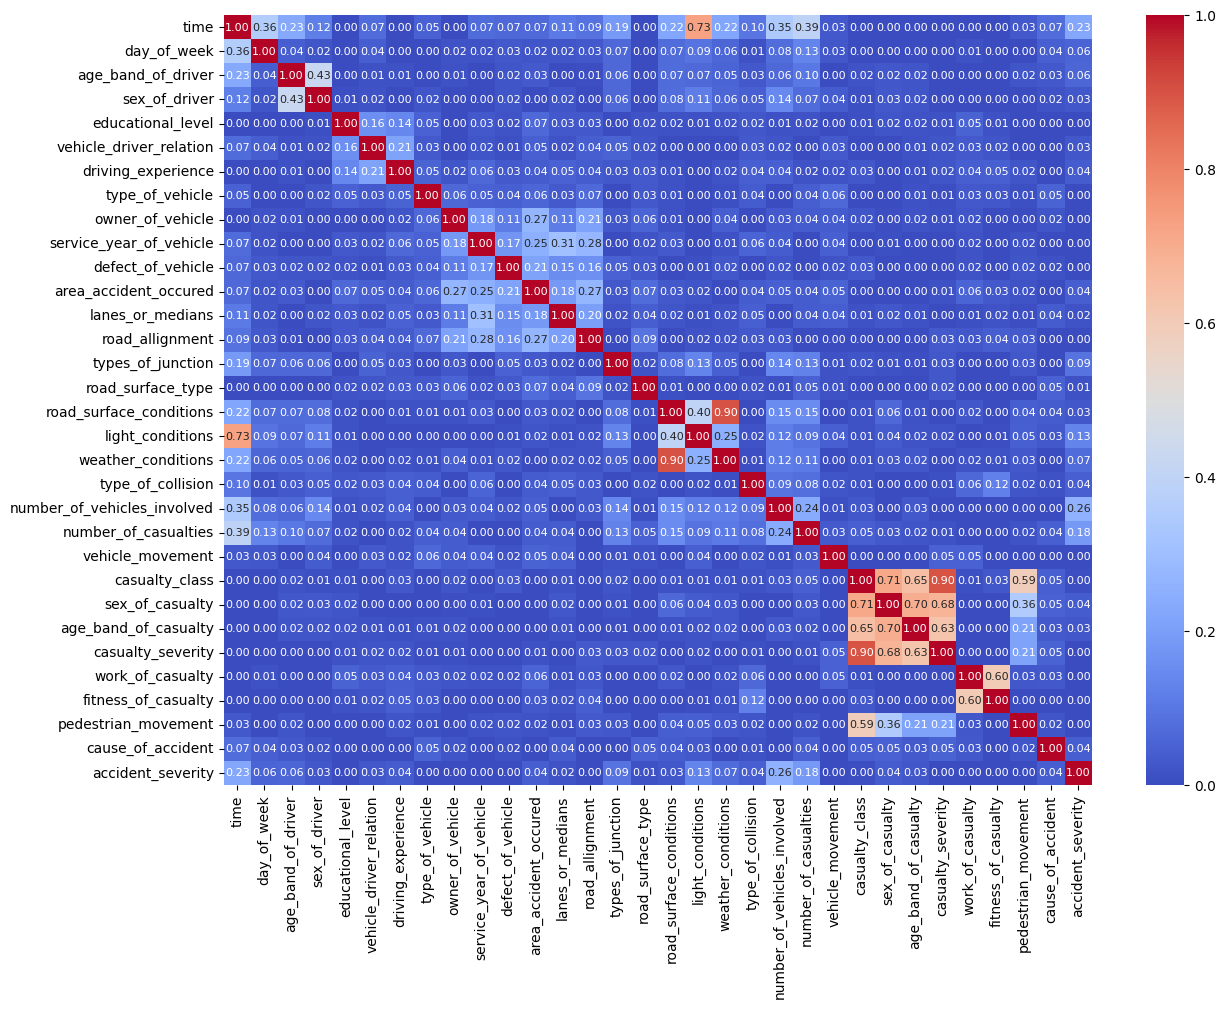

In [50]:
plt.figure(figsize=(14, 10))
sns.heatmap(phik_overview, annot=True, fmt=".2f", annot_kws={"size": 8}, cmap="coolwarm")

### Visualisations (add some plots)

In [51]:
df.columns

Index(['time', 'day_of_week', 'age_band_of_driver', 'sex_of_driver',
       'educational_level', 'vehicle_driver_relation', 'driving_experience',
       'type_of_vehicle', 'owner_of_vehicle', 'service_year_of_vehicle',
       'defect_of_vehicle', 'area_accident_occured', 'lanes_or_medians',
       'road_allignment', 'types_of_junction', 'road_surface_type',
       'road_surface_conditions', 'light_conditions', 'weather_conditions',
       'type_of_collision', 'number_of_vehicles_involved',
       'number_of_casualties', 'vehicle_movement', 'casualty_class',
       'sex_of_casualty', 'age_band_of_casualty', 'casualty_severity',
       'work_of_casualty', 'fitness_of_casualty', 'pedestrian_movement',
       'cause_of_accident', 'accident_severity'],
      dtype='object')

In [52]:
grouped_time = df.groupby('time').size().reset_index(name='count')
px.line(grouped_time, x='time', y='count', title = 'Number of entries per time')

In [53]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
grouped_time = df.groupby('day_of_week').size().reset_index(name='count')
px.bar(grouped_time, x='day_of_week', y='count', title = 'Number of entries per day of week', category_orders={"day_of_week": day_order})